# 03. 아달라인
> 인공신경망 알고리즘인 아달라인에 대해 배워봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 6]
- permalink: /adaline
- exec: colab

### 1. 아달라인(Adaline)

단층 인공신경망인 퍼셉트론이 발표된지 몇 년 후인 1960년에 Bernard Widrow와 Tedd Hoff는 퍼셉트론 알고리즘을 향상시킨 새로운 인공신경망 알고리즘에 대한 논문을 발표합니다. 이 인공신경망을 Adaptive Linear Neuron, 줄여서 Adaline(아달라인)이라 불렀습니다. <br><br>

아달라인은 분류(classification)를 위한 보다 발전된 머신러닝 알고리즘인 회귀(regression), 로지스틱 회귀(logistic regression), SVM(Support Vector Machine)에 대한 알고리즘의 토대를 마련하게 됩니다. <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/19.png?raw=true)

퍼셉트론과 알다라인의 차이점은 바로 가중치 업데이트를 위한 **활성 함수(Activation Function)가 다른 것**입니다. 위 그림은 이전 글에서 설명했던 퍼셉트론 알고리즘을 도식화 한 것입니다.
<br><br>

위의 두 그림을 보면 알 수 있듯이, 퍼셉트론에서는 활성 함수가 순입력 함수의 리턴값을 임계값을 기준으로 1 또는 -1로 리턴한 값과, 실제 결과값을 임계값을 기준으로 1 또는 -1로 리턴한 값을 비교하여 가중치를 업데이트 하도록 하거나 결과를 출력하는 기능을 하였습니다.
<br><br>

그런데 아달라인에서는 활성화 함수의 리턴값과 실제 결과값을 비교하여 이 오차가 최소가 되도록 가중치를 업데이트 하는 기능을 활성 함수가 수행하게 됩니다. 이를 위해 아달라인을 발표한 논문에서는 최소제곱법을 이용한 오차 함수(loss function) $J(w) = \sum_i (y_i - \hat{y_i})^2$를 정의하였습니다. 그리고 J(w) 값이 최소가 되도록 가중치를 업데이트 하는 것이 핵심입니다. 이 내용은 이미 선형회귀 시간에 배운 내용인데요. 사실 선형회귀에서 Gradient Descent를 통해 최적해를 찾는 부분은 Adaline 논문으로부터 온 것입니다.
<br><br>

Adaline을 Python으로 구현해봅시다. 기존 Perceptron과 거의 흡사하지만, 에러를 1과 -1에서 빼는 것이 아니라 최소제곱법(MSE)로 Loss함수를 계산해서 오차를 최소화하는 방식으로 변경되었습니다.

In [1]:
import numpy as np

class Adaline:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+X. shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            output = self.net_input(X)

            errors = (y-output)
            self.w_[1:] += self.eta * X.T @ errors
            self.w_[0] += self.eta * errors.sum()

            LOSS = (errors**2).sum()/2
            self.errors_.append(LOSS)
        return self
    
    def net_input(self, X):
        return X @ self.w_[1:] + self.w_[0] # bias 
        
    def predict(self, X):
        return 1 if self.net_input(X) > self.thresholds else -1

![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99E6363359D86A8805)

아달라인의 가중치를 업데이트하는 식은 다음과 같습니다. $w_i = w_i + \eta \sum_i (y_i - \hat{y_i}^2)$ 여기에서 주목할 부분은 바로 $\eta$인데요. 이는 이전에도 말했듯이 learning rate라고 부릅니다. 이 learning rate는 기울기 값이 너무 커서 붙여주는 임의의 작은 소수값인데요. 따라서 이 learning rate를 크게하면 한 스텝 움직일 때 마다 기울기를 크게 빼서 w가 한번에 많이씩 움직이게 되고, learning rate가 작으면  한 스텝 움직일 때 마다 기울기를 작게 빼서 w가 한번에 조금씩 움직이게 됩니다. <br><br>


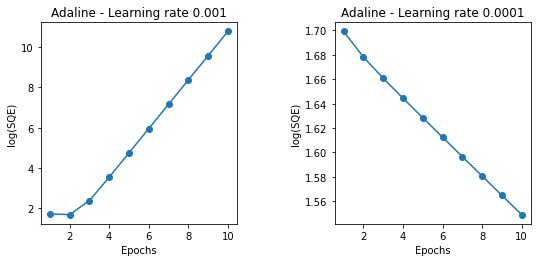

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

iris_dataset = load_iris()
y = iris_dataset.target[:100]
X = iris_dataset.data[:100]
y = np.where(y==0, -1, 1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

adal = Adaline(eta=0.001, n_iter=10).fit(X, y)
ax[0].plot(range(1, len(adal.errors_) + 1), np.log10(adal.errors_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SQE)')
ax[0].set_title('Adaline - Learning rate 0.001')

adal2 = Adaline(eta=0.0001, n_iter=10).fit(X, y)
ax[1].plot(range(1, len(adal2.errors_) + 1), np.log10(adal2.errors_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(SQE)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.9, wspace=0.5, hspace=0.5)
plt.show()
plt.close()


위의 두개의 그래프를 보면 learning rate를 0.001로 하면 오차가 오히려 점점 커져서 높아지고, learning rate를 0.0001로 하면 오차가 점점 작아집니다. 그 이유는 아래 그림에서 찾을 수 있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/20.png?raw=true)

아달라인이 제대로 수행되려면 위 그림의 왼쪽 그림과 같이 초기 가중치로부터 곡선을 따라 아래로 차근차근 내려가야 하는데, 이렇게 되려면 w의 기울기 값이 점점 작아져야 합니다. 만약 w의 기울기 값이 점점 커지게 되면 위 그림의 오른쪽 그림과 같이 초기 가중치가 위치한 부분에서 곡선의 최소값을 건너뛴 위치에서 다시 스텝을 계산하게 되고 이런 식으로 스텝의 크기가 갈수록 커져버려서 비용함수 J(w)의 값은 발산하게 됩니다. 
<br><br>

learning rate의 값이 매우 작으면 J(w)의 값은 수렴하지만, 의미 있는 값으로 수렴하는 것을 확인하려면 매우 많은 반복 회수가 필요합니다. 다음에는 정규분포에서 사용되는 표준화(standardization)를 이용해 이런 단점을 극복하는 아달라인 알고리즘을 적용해보도록 합니다. 


<br>

### 2. 표준화를 적용한 Adaline

단순한 단층 인공신경망인 아달라인을 구현해 보았습니다. 하지만 매우 작은 값의 learning rate을 적용해야 비용함수가 특정값에 수렴하게 되어 머신러닝이 유효하게 되지만, 이는 매우 많은 수의 반복 학습이 필요하게 되어 머신러닝을 수행하는데 있어 성능상의 문제가 발생한다고 했습니다. <br><br>

하지만 통계학에서 말하는 표준화(Standardization)를 이용해 트레이닝 데이터를 표준화된 값으로 변환하여 머신러닝을 수행하게 되면 비교적 큰 값의 learning rate에도 신경망이 잘 학습됩니다. 표준화는 일반적으로 $\frac{x - mean}{std}$처럼 계산합니다. 머신러닝 강의때 많이 봐서 익숙하죠?

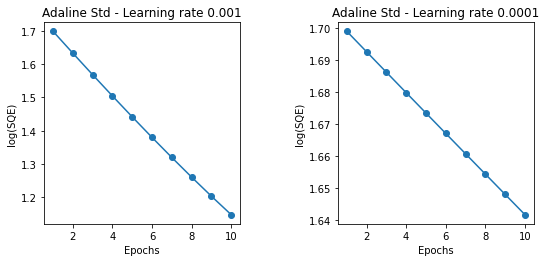

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

iris_dataset = load_iris()
y = iris_dataset.target[:100]
X = iris_dataset.data[:100]
X = (X - X.mean()) / X.std()
y = np.where(y==0, -1, 1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

adal = Adaline(eta=0.001, n_iter=10).fit(X, y)
ax[0].plot(range(1, len(adal.errors_) + 1), np.log10(adal.errors_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SQE)')
ax[0].set_title('Adaline Std - Learning rate 0.001')

adal2 = Adaline(eta=0.0001, n_iter=10).fit(X, y)
ax[1].plot(range(1, len(adal2.errors_) + 1), np.log10(adal2.errors_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(SQE)')
ax[1].set_title('Adaline Std - Learning rate 0.0001')

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.9, wspace=0.5, hspace=0.5)
plt.show()
plt.close()

표준화를 이용하면 learning rate을 0.001로 두어도 비용함수의 값이 발산하지 않고 특정한 값에 수렴하고 있음을 알 수 있습니다. 여기까지 살펴본 아달라인 내용은 우리가 가지고 있는 모든 트레이닝 데이터를 한꺼번에 일괄 적용하여 학습을 수행하는 것이었습니다. 
<br><br>

이를 배치 경사하강법(Batch Gradient Descent)을 이용한 아달라인이라 부릅니다. 배치 경사하강법을 이용하는 경우, 데이터의 개수가 매우 많아지고, 데이터 입력값의 종류도 다양하다면 머신러닝을 효율적으로 수행할 수 없고 시간도 매우 오래 걸리게 됩니다. 다음 포스팅에서는 이를 극복하기 위한 확률적 경사하강법(Stochastic Gradient Descent)을 이용하는 아달라인에 대해 다루도록 하겠습니다. 

<br>

### 3. 확률적 경사 하강법(SGD)를 적용한 Adaline

우리가 실제로 다루는 데이터는 매우 큰 용량의 데이터가 대부분이며 , 이런 대규모 데이터에 대한 머신러닝을 이전 포스팅에서 설명한 배치 경사하강법을 이용한 아달라인을 그대로 활용하는 것은 성능면에서 문제가 있습니다. 이런 문제점을 극복하기 위한 방법으로 확률적 경사하강법(Stochastic Gradient Descent)을 적용한 아달라인이 있습니다.
<br><br>

이전 내용 중 아달라인의 가중치 업데이트 수식을 다시 상기해 봅니다.

<br>
$$w_i = w_i + \eta \sum_i (y_i - \hat{y_i})^2$$
<br>

이 수식의 계산을 위해, **모든** 트레이닝 데이터의 실제 결과값과 예측값의 차를 더한 값을 구해야 합니다. 그런데, 확률적 경사하강법에서는 아래와 같이 i번째 트레이닝 데이터에 대해서만 계산한 값을 이용합니다.

<br>
$$w_i = w_i + \eta (y_i - \hat{y_i})^2$$
<br>

예를 들어 이해를 해봅니다. 100만개의 트레이닝 데이터가 있다고 가정합니다. 이를 배치 경사하강법으로 계산하려면 100만 x 100만 = 1조 번의 연산이 필요합니다. 이는 가중치를 업데이트 하는 식에서 $\hat{y_i}$를 계산하기 위해 100만번의 덧셈을 해야하고, $w_i$를 최종적으로 업데이트하기 위해 전체적으로 또 100만번의 덧셈을 수행해야 하기 때문입니다.
<br><br>


그런데, 확률적 경사하강법을 적용하게 되면 100만개의 모든 데이터를 활용하여 머신러닝을 수행하더라도 100만번의 연산만 필요합니다. 확률적 경사하강법을 이용하면 배치 경사하강법의 근사치로 계산되지만 가중치를 업데이트하는 시간이 빠르기 때문에 실제로는 비용함수의 수렴값에 더 빨리 도달하게 됩니다. 그리고, 확률적 경사하강법에서 비용함수의 값을 계산할 때 값이 순환되는 것을 피하기 위해 학습을 반복할 때마다 트레이닝 데이터의 순서를 랜덤하게 섞어서 수행하는 것이 좋습니다. 
<br><br>

또한 크라우드 소싱(crowd sourcing)으로 머신러닝을 적용하는 웹에서도 확률적 경사하강법을 활용할 수 있습니다. 어떤 사람이 웹을 통해 데이터를 제공하고, 이 데이터에 대한 예측 결과를 그 사람에게 제시하여 피드백을 받아 재학습을 시키는 것이 바로 그 예입니다. 



In [4]:
import numpy as np
from numpy.random import seed

class AdalineSGD():
    def __init__(self, eta=0.01, n_iter=10,shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        self.w_ = np.zeros(1+X. shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            err = []
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target-output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error
                err.append(0.5*error**2)

            avg_err = sum(err)/len(y)
            self.errors_.append(avg_err)
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        return X @ self.w_[1:] + self.w_[0] # bias 
        
    def predict(self, X):
        return 1 if self.net_input(X) > self.thresholds else -1

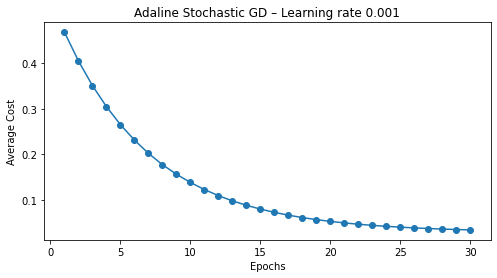

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

iris_dataset = load_iris()
y = iris_dataset.target[:100]
X = iris_dataset.data[:100]
X = (X - X.mean()) / X.std()
y = np.where(y==0, -1, 1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

adal = AdalineSGD(eta=0.001, n_iter=30, random_state=1).fit(X, y)
plt.plot(range(1, len(adal.errors_) + 1), adal.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.title('Adaline Stochastic GD – Learning rate 0.001')
plt.show()
    

위 그래프를 보면, 오차함수의 값이 빠르게 줄어드는 것을 볼 수 있습니다. 이유는 한번의 반복문에서 가중치를 업데이트하는 빈도수가 더 많이 일어나기 때문이지요. 학습 반복회수가 늘어나면 결국 배치 경사하강법을 적용한 아달라인과 비슷해짐을 알 수 있습니다. 이로서 모든 데이터를 메모리에 올리지 않고도 학습이 가능합니다. 이러한 학습 방법을 SGD 혹은 미니배치 트레이닝이라고 부릅니다.
<br><br>

이미 말했듯이 퍼셉트론이나 이를 발전시킨 아달라인은 머신러닝을 위한 트레이닝 데이터가 완전히 선형 분리가 되어 있지 않으면 제대로 된 머신러닝을 수행할 수 없습니다. 하지만 우리가 접하는 대부분의 데이터들은 선형 분리가 불가능한 것들이며, 이런 이유로 머신러닝을 위한 방법으로써 퍼셉트론은 실제로 잘 활용되지는 않습니다. 그렇지만 퍼셉트론은 분류(classification)를 위한 다양한 알고리즘의 개발과 발전에 기초 개념을 제공했다는 것만으로도 매우 가치가 있습니다.

<br>

### 4. sklearn에서 퍼셉트론 사용해보기

sklearn에서도 Perceptron을 사용해볼 수 있습니다. 아래 코드를 볼까요?


In [8]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
X = (X - X.mean()) / X.std()
y = iris.target
    
split = int(0.8 * len(X))
train_x, train_y = X[:split], y[:split]
test_x, test_y = X[split:], y[split:]

model = Perceptron(eta0=0.01, max_iter=1000, tol=0,  random_state=0)
model.fit(train_x, train_y)
pred = model.predict(test_x)
print('총 테스트 개수: %d, 오류개수:%d' % (len(test_y), (test_y != pred).sum()))
print('정확도: %.2f'%accuracy_score(test_y, pred))

총 테스트 개수: 30, 오류개수:2
정확도: 0.93


c:\users\asus\desktop\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


매우 훌륭하게 잘 작동합니다. 그러나 퍼셉트론과 아달라인은 선형적인 경우 외에는 작동하지 않습니다. 따라서 XOR같은 비선형 문제를 해결할 수 없는데요. 이를 해결하기 위해 퍼셉트론을 여러층으로 쌓은 다층 퍼셉트론에 대해 알아봅시다.